In [1]:
#
# Working through
# https://github.com/salvadorgarciamunoz/kipet/blob/master/kipet/examples/Ex_7_conc_input_conf_k_aug.py
#

In [2]:
from kipet import KipetModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

    Set objects from pyomo.core.base.set or pyomo.core.  (deprecated in 5.7)
    (called from <frozen importlib._bootstrap>:219)
_SetProduct not found


In [26]:
filename = '/home/paperspace/learn_kipet/my_data_sets/ABC_data.csv'
C_data = pd.read_csv(filename, index_col = 0)
C_data.columns = ['A', 'B', 'C']
C_data

,A,B,C
t,,,
0.000,0.957,-0.031,-0.015
0.263,0.557,0.330,0.044
0.526,0.342,0.512,0.156
0.789,0.224,0.499,0.310
1.053,0.123,0.428,0.454
1.316,0.079,0.396,0.556
1.579,0.035,0.303,0.651
1.842,0.029,0.287,0.658
2.105,0.025,0.221,0.750


In [27]:
C_data = C_data.iloc[[8, 9]]
C_data

,A,B,C
t,,,
2.105,0.025,0.221,0.750
2.368,0.017,0.148,0.854


In [28]:
mdl = KipetModel()

r1 = mdl.new_reaction('rxn1')

r1.add_component('A', state = 'concentration', init = 1.0, variance = 1)
r1.add_component('B', state = 'concentration', init = 0.0, variance = 1)
r1.add_component('C', state = 'concentration', init = 0.0, variance = 1)

r1.add_parameter('k1', init = 5.0, bounds = (0.0, 10.0))
r1.add_parameter('k2', init = 5.0, bounds = (0.0, 10.0))

In [29]:
# define explicit system of ODEs
def rule_odes(m,t):
    exprs = dict()
    exprs['A'] = -m.P['k1']*m.Z[t,'A']
    exprs['B'] = m.P['k1']*m.Z[t,'A']-m.P['k2']*m.Z[t,'B']
    exprs['C'] = m.P['k2']*m.Z[t,'B']
    return exprs

r1.add_equations(rule_odes)
r1.set_times(0.0, 5.0)

In [30]:
r1.add_dataset('C_data', category = 'concentration', data = C_data)

In [31]:
r1.settings.collocation.nfe = 50
r1.settings.collocation.ncp = 3
r1.settings.parameter_estimator['solver'] = 'k_aug'
r1.settings.solver.linear_solver = 'ma27'

In [32]:
r1.create_pyomo_model()

times are: <class 'tuple'>
0.0 5.0


In [33]:
r1.model.pprint()

14 Set Declarations
    Cm_indx : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     2 :    Any :    6 : {(2.105, 'A'), (2.105, 'B'), (2.105, 'C'), (2.368, 'A'), (2.368, 'B'), (2.368, 'C')}
    U_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain                           : Size : Members
        None :     2 : allmeas_times*mixture_components :    6 : {(2.105, 'A'), (2.105, 'B'), (2.105, 'C'), (2.368, 'A'), (2.368, 'B'), (2.368, 'C')}
    Z_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain                     : Size : Members
        None :     2 : alltime*mixture_components :   12 : {(0, 'A'), (0, 'B'), (0, 'C'), (2.105, 'A'), (2.105, 'B'), (2.105, 'C'), (2.368, 'A'), (2.368, 'B'), (2.368, 'C'), (5, 'A'), (5, 'B'), (5, 'C')}
    algebraics : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :    -- :    Any :    0 :      {}
    allmeas_times : 

In [34]:
tlist = [t for t in r1.model.alltime]
len(tlist), C_data.shape

(4, (2, 3))

In [35]:
r1.run_opt()

        0.11 seconds required to write file
        0.11 seconds required for presolve
Ipopt 3.12: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:     3903
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      306

Total number of variables............................:      905
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
T

W[K_AUG]...	[K_AUG_ASL]No n_rhs declared
W[K_AUG]...	[K_AUG_ASL]Target log10mu:= -11.
W[K_AUG]...	[K_AUG_ASL]No f_timestamp suffix declared, Fallback to default writing mode.
I[K_AUG]...	[K_AUG_ASL] Filename for dot_sens dot_in_.in


[K_AUG] written by D.T. @2018

: I[K_AUG]...	[K_AUG_ASL]File read succesfull
I[K_AUG]...	[K_AUG_ASL]Number of Right hand sides 0
I[K_AUG]...	[K_AUG_ASL]Number of Right hand sides: 0
I[K_AUG]...	[K_AUG_ASL]Number of variables       : 905
I[K_AUG]...	[K_AUG_ASL]Number of constraints     : 903
I[K_AUG]...	[K_AUG_ASL]Number of valid n_dof     : 2
I[K_AUG]...	[ADJUST_MU]log10(mu) computed=-8.60634178881996 at var_i=300
I[K_AUG]...	[ADJUST_MU]log10(mu) close to the target	-8.60030926386917 at var_i=301
I[K_AUG]...	[FIND_INEQUALITIES]summary: eq: 903, leq: 0, geq: 0 
I[K_AUG]...	[K_AUG_ASL]Nonzeroes in the sparse Jacobian 3903
I[K_AUG]...	[GET_HESS_ASL]Objective found
I[K_AUG]...	[GET_HESS_ASL]Nonzeroes in the sparse hessian 306
I[K_AUG]...	[GET_HESS_ASL]Minimization problem detected
I[K_AUG]...	[GET_HESS_ASL]Current objective 0.001896
I[K_AUG]...	[GET_HESS_ASL]Missing nz in the Hessian of the Lag: 899
I[K_AUG]...	[K_AUG_ASL]Barrier term added.
I[K_AUG]...	[K_AUG_ASL]MC19 scaling...
I[K_AUG].


RESULTS
Z:
                  A         B         C
0.000000  1.000000  0.000000  0.000000
0.020399  0.964307  0.035300  0.000393
0.084851  0.859676  0.133982  0.006342
0.131562  0.791020  0.194380  0.014600
0.151961  0.762786  0.218100  0.019114
...            ...       ...       ...
4.888547  0.000165  0.012898  0.986937
4.917750  0.000156  0.012509  0.987335
4.930503  0.000153  0.012342  0.987505
4.970797  0.000142  0.011831  0.988027
5.000000  0.000135  0.011474  0.988391

[151 rows x 3 columns]

Cm:
            A      B      C
2.105  0.025  0.221  0.750
2.368  0.017  0.148  0.854

dZdt:
                  A         B         C
0.000000  0.000000  0.000000  0.000000
0.020399 -1.718309  1.680478  0.037831
0.084851 -1.531868  1.388281  0.143587
0.131562 -1.409528  1.201213  0.208315
0.151961 -1.359217  1.125481  0.233736
...            ...       ...       ...
4.888547 -0.000294 -0.013529  0.013823
4.917750 -0.000279 -0.013127  0.013405
4.930503 -0.000272 -0.012955  0.013227
4.970797 -

In [36]:
print("The estimated parameters are:")
# Display the results
r1.results.show_parameters

The estimated parameters are:

The estimated parameters are:
k1 1.7819118038498534
k2 1.071690772472979


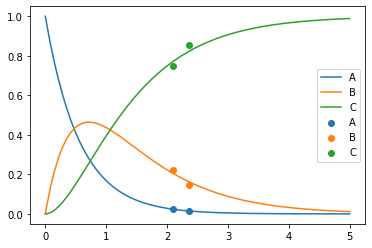

In [37]:
fig, ax = plt.subplots()
for c in ['A', 'B', 'C']:
    ax.scatter(r1.results.Cm.index, r1.results.Cm[c], label = c)
    ax.plot(r1.results.Z.index, r1.results.Z[c], label = c)
ax.legend()

In [17]:
dof = r1.results.Cm.shape[0] * 3 - 2
cov_mat = r1.results.objective / dof * r1.results.parameter_covariance
cov_mat

array([[ 3.53261176e+01, -4.87086619e-01],
       [-4.87086619e-01,  7.02231148e-03]])